# Estatística Frequências e Medidas

#### **Desafio Final:**

Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [300]:
arquivo = 'enem_2023.json'
df = pd.read_json(arquivo)
df.reset_index(drop=True, inplace=True)
print(df)

     Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
0    585.669300        686.512178            390.482473  452.281333   
1    359.384608        642.084134                   NaN  412.205207   
2    622.732384        495.510719            443.183580  669.683401   
3    350.164605        602.041588            413.979810  676.608952   
4    384.093657        489.249140            609.758123  520.426698   
..          ...               ...                   ...         ...   
995  455.479216        557.756326            511.347833  510.358766   
996  457.755594        444.616952            542.028624  419.689692   
997  551.173161        568.769704            508.034658         NaN   
998  495.804002        522.125008            414.167228  451.696456   
999  435.332469        425.941701                   NaN  466.003345   

        Redação    Sexo  
0    546.371706   Homem  
1    741.825256  Mulher  
2    684.515750   Homem  
3    671.237114   Homem  
4    744.375048  

In [301]:
# conhecendo os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.


#### 1. Qual das disciplinas tem a maior amplitude de nota?

In [302]:
# selecionando amplitude de notas baseado na função describe

def describe_amplitude(df):
    df = df.describe()
    df.loc["amplitude"] = df.loc['max'] - df.loc['min']
    return df

amplitude_notas = describe_amplitude(df).loc["amplitude"]

print(f'A maior amplitude de notas foi de {amplitude_notas.max().round(2)} para a disciplina {amplitude_notas.idxmax()}.')

A maior amplitude de notas foi de 729.16 para a disciplina Redação.


#### 2. Qual é a média e a mediana para cada uma das disciplinas?

In [303]:
# criando variável de disciplinas
disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# definindo média e mediana por disciplina
media_disciplina = df[disciplinas].mean().round(2).to_string(header=False)
mediana_disciplina = df[disciplinas].dropna().median().round(2).to_string(header=False)

print(f'A média para cada disciplina é de:\n{media_disciplina}\n\nA mediana de cada disciplina é de:\n{mediana_disciplina}')

A média para cada disciplina é de:
Linguagens              514.52
Ciências humanas        527.04
Ciências da natureza    499.32
Matemática              535.97
Redação                 637.78

A mediana de cada disciplina é de:
Linguagens              517.13
Ciências humanas        528.50
Ciências da natureza    502.94
Matemática              532.96
Redação                 639.60


#### 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

```
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
```

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [304]:
# definindo os pesos
peso_ciencias_comp = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

# calculando a média ponderada para todas as disciplinas
ponderada_ciencias_comp = np.average(df[disciplinas], weights=[peso_ciencias_comp[d] for d in disciplinas], axis=1)

# adicionando a média ponderada ao df para o curso de ciências da computação
df_ciencias_comp = df.copy()
df_ciencias_comp['Média Ponderada'] = ponderada_ciencias_comp

# selecionando os 500 estudantes mais bem colocados
df_500_ponderado = df_ciencias_comp.nlargest(500, 'Média Ponderada')

# calculando a média e o desvio padrão das notas ponderadas
media_ponderada_ciencias = df_500_ponderado['Média Ponderada'].mean().round(2)
std_ponderado_ciencias = df_500_ponderado['Média Ponderada'].std().round(2)

print(f'Média ponderada de notas dos 500 estudantes mais bem colocados: {media_ponderada_ciencias}')
print(f'Desvio padrão de notas dos 500 estudantes mais bem colocados: {std_ponderado_ciencias}')

Média ponderada de notas dos 500 estudantes mais bem colocados: 557.29
Desvio padrão de notas dos 500 estudantes mais bem colocados: 40.44


#### 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [305]:
df_40_ponderado = df_ciencias_comp.nlargest(40, 'Média Ponderada')

# média e variância dos 40 melhores estudantes
media_40_ciencias = np.mean(df_40_ponderado['Média Ponderada'])
variancia_40_ciencias = np.var(df_40_ponderado['Média Ponderada'], ddof=1)  # argumento ddof=1 para indicar que é uma amostra

# cálculo do desvio padrão da amostra
desvio_padrao_ciencias = np.std(df_40_ponderado['Média Ponderada'], ddof=1)

print(f"\nMédia geral dos 40 melhores estudantes é de: {media_40_ciencias.round(2)}")
print(f"Variância dos 40 melhores estudantes é de: {variancia_40_ciencias.round(2)}")
print(f"Desvio padrão da amostra é de: {desvio_padrao_ciencias.round(2)}")


Média geral dos 40 melhores estudantes é de: 636.68
Variância dos 40 melhores estudantes é de: 295.77
Desvio padrão da amostra é de: 17.2


#### 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [306]:
# criando variável com o terceiro quartil Q3

q3_matematica = df['Matemática'].quantile(0.75).round(2)
q3_linguagens = df['Linguagens'].quantile(0.75)

print(f'Terceiro quartil para matemática é de: {q3_matematica.round(2)}')
print(f'Terceiro quartil para linguagens é de: {q3_linguagens.round(2)}')

Terceiro quartil para matemática é de: 592.91
Terceiro quartil para linguagens é de: 571.64


#### 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

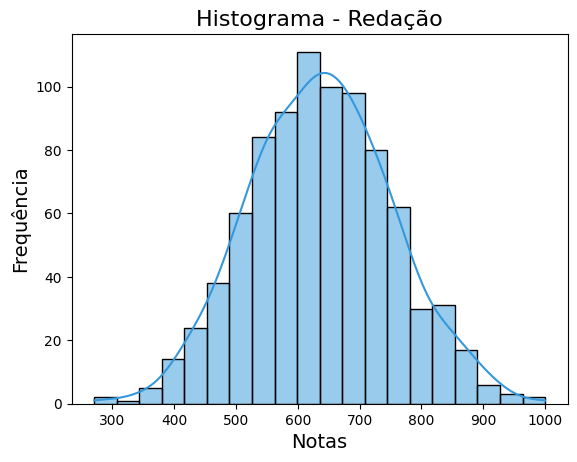

In [307]:
# plotando o histograma de 'Redação'

sns.histplot(df['Redação'], bins=20, kde=True, color='#3498db', label='Redação')

plt.xlabel('Notas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma - Redação', fontsize=16)
plt.show()  ### Simétrico

In [308]:
# definindo função para calcular simetria baseada no Coeficiente de assimetria de Pearson

from scipy.stats import skew

def calcular_assimetria(df):
    df_sem_nan = df.dropna()
    skewness = skew(df_sem_nan)

    if skewness > 0.5:
        return 'Assimetria à Direita (positiva)'
    elif -0.5 <= skewness <= 0.5:
        return 'Assimetria nula ou próxima de zero'
    else:
        return 'Assimetria à Esquerda (negativa)'

# respondendo simetria

resultado_redacao = calcular_assimetria(df['Redação'])

print(f"O resultado da assimetria de Pearson para a disciplina 'Redação' é: \n{resultado_redacao}.")

O resultado da assimetria de Pearson para a disciplina 'Redação' é: 
Assimetria nula ou próxima de zero.


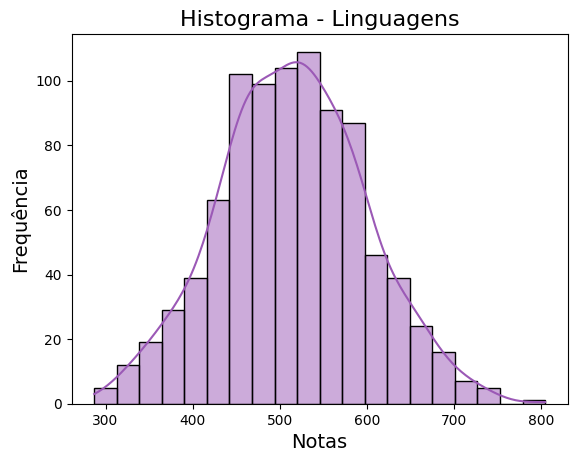

In [309]:
# plotando o histograma de 'Linguagens'

sns.histplot(df['Linguagens'], bins=20, kde=True, color='#9b59b6', label='Linguagens')

plt.xlabel('Notas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma - Linguagens', fontsize=16)
plt.show()

In [310]:
# respondendo simetria

resultado_linguagens = calcular_assimetria(df['Linguagens'])
print(f"O resultado da assimetria de Pearson para a coluna 'Linguagens' é: \n{resultado_linguagens}.")

O resultado da assimetria de Pearson para a coluna 'Linguagens' é: 
Assimetria nula ou próxima de zero.


#### **<font color='f9e79f'> Resposta: </font>** Ambos os histrogramas são simétricos, baseados no Coeficiente de assimetria de Pearson. Se o coeficiente for nulo ou próximo a zero, a distribuição será simétrica.

#### 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria?

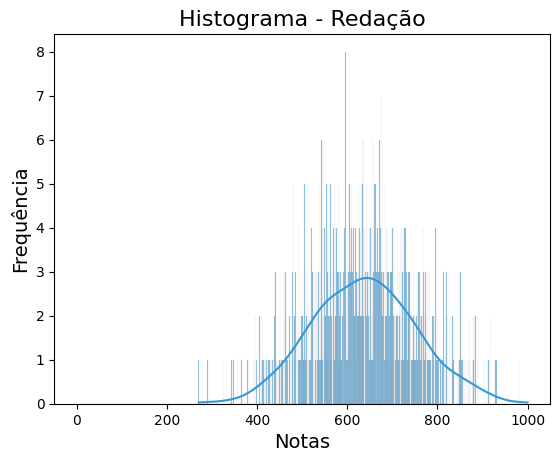

In [311]:
sns.histplot(df['Redação'], bins=range(0, 1000), kde=True, color='#3498db', label='Redação') ## mesmo código, alteração de bins

plt.xlabel('Notas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma - Redação', fontsize=16)
plt.show()

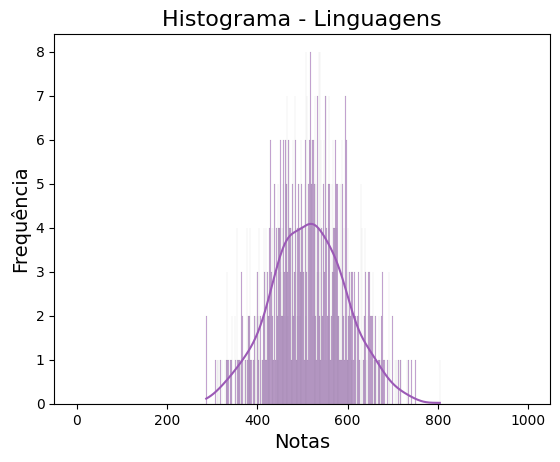

In [312]:
sns.histplot(df['Linguagens'],bins=range(0, 1000), kde=True, color='#9b59b6', label='Linguagens') ## mesmo código, alteração de bins

plt.xlabel('Notas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma - Linguagens', fontsize=16)
plt.show()

#### **<font color='f9e79f'> Resposta: </font>** Os bins utilizados em um histograma podem influenciar visualmente a distribuição dos dados, mas a assimetria em si é uma característica intrínseca da distribuição.

#### 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

In [313]:
df_ciencias_redacao = df[["Ciências da natureza", "Redação"]].dropna() # dropna para evitar divergência no boxplot

def outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = []

    for value in df[column].values:
        if ((value < lower) or (value > upper)):
            outliers.append(value)
    print(f'Disciplina: {column}, o número de outliers encontrados foi: ', len(outliers))

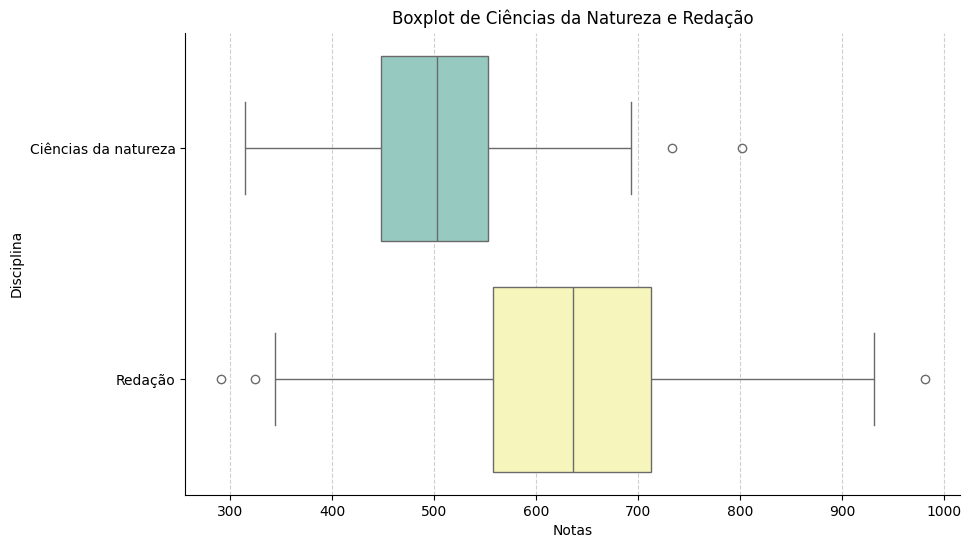

In [314]:
# boxplot para ambas disciplinas
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_ciencias_redacao, orient='h', palette='Set3')

# adicionando título e rótulos aos eixos
plt.title('Boxplot de Ciências da Natureza e Redação')
plt.xlabel('Notas')
plt.ylabel('Disciplina')

# otimizando visual
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [315]:
for column in df_ciencias_redacao:
    outlier(df_ciencias_redacao,column)

Disciplina: Ciências da natureza, o número de outliers encontrados foi:  2
Disciplina: Redação, o número de outliers encontrados foi:  3


#### **<font color='f9e79f'> Resposta: </font>** Foram encontrados 2 outliers para a disciplina Ciências da Natureza; e 3 outliers para a disciplina Redação. Conforme código acima.


#### 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [316]:
def remover_outlier(df, columns):
    df_sem_outlier = df.copy()  # Crie uma cópia do DataFrame para evitar modificações indesejadas

    for column in columns:
        q1 = df_sem_outlier[column].quantile(0.25)
        q3 = df_sem_outlier[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # Remova os outliers da coluna atual
        df_sem_outlier = df_sem_outlier[(df_sem_outlier[column] >= lower) & (df_sem_outlier[column] <= upper)]

    return df_sem_outlier

# Suponha que você tenha um DataFrame chamado 'df' com as colunas mencionadas.
# colunas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']
df_sem_outlier = remover_outlier(df, disciplinas)

medias_sem_outlier = df_sem_outlier.mean(numeric_only=True).dropna()
medias_com_outlier = df.mean(numeric_only=True).dropna()

print('As médias removendo os outliers são:')
print(medias_sem_outlier)

print('\nAs médias sem remover os outliers são:')
print(medias_com_outlier)

As médias removendo os outliers são:
Linguagens              517.183638
Ciências humanas        527.190923
Ciências da natureza    501.359534
Matemática              535.316784
Redação                 640.684686
dtype: float64

As médias sem remover os outliers são:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64


In [317]:
# calculando se possui diferença percentual significativa

for disciplina in disciplinas:
    diferenca_percentual = ((df_sem_outlier[disciplina].mean() - df[disciplina].mean()) / df[disciplina].mean()) * 100

    alteracao_significativa = abs(diferenca_percentual) > 5 ## verificando o grau de significância '>5%'

    # resultados para cada disciplina
    print(f'{disciplina}:')
    print(f' - Percentual de alteração na média: {diferenca_percentual:.2f}%')
    print(f' - Alteração significativa: {alteracao_significativa}\n')

Linguagens:
 - Percentual de alteração na média: 0.52%
 - Alteração significativa: False

Ciências humanas:
 - Percentual de alteração na média: 0.03%
 - Alteração significativa: False

Ciências da natureza:
 - Percentual de alteração na média: 0.41%
 - Alteração significativa: False

Matemática:
 - Percentual de alteração na média: -0.12%
 - Alteração significativa: False

Redação:
 - Percentual de alteração na média: 0.45%
 - Alteração significativa: False



#### **<font color='f9e79f'> Resposta: </font>** A ausência de outliers alterou a média de todas as disciplinas, porém em nenhuma delas a alteração foi considerada significativa.


#### 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [318]:
df.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [319]:
df.mean()

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [320]:
df.std()

Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 115.339972
dtype: float64

In [321]:
# substituindo dados nulos por 'média'

def fillna_mean(df):
    for column in df.select_dtypes(include=np.number):
        df[column] = df[column].fillna(df[column].mean())

    df_mean = df.mean()
    df_std = df.std()
    return print(f"Média sem dados nulos:\n{df_mean}\n\nDesvio padrão sem dados nulos:\n{df_std}")

df_nan_mean = df.copy()
fillna_mean(df_nan_mean)

Média sem dados nulos:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Desvio padrão sem dados nulos:
Linguagens               79.560718
Ciências humanas         75.277806
Ciências da natureza     71.486677
Matemática               83.286987
Redação                 106.953175
dtype: float64


In [322]:
# substituindo dados nulos por 'mediana'

def fillna_median(df):
    for column in df.select_dtypes(include=np.number):
        df[column] = df[column].fillna(df[column].median())

    df_mean = df.mean()
    df_std = df.std()
    return print(f"Média sem dados nulos:\n{df_mean}\n\nDesvio padrão sem dados nulos:\n{df_std}")

df_nan_median = df.copy()
fillna_median(df_nan_median)

Média sem dados nulos:
Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
dtype: float64

Desvio padrão sem dados nulos:
Linguagens               79.560876
Ciências humanas         75.280340
Ciências da natureza     71.488051
Matemática               83.290104
Redação                 106.956723
dtype: float64


In [323]:
# substituindo dados nulos por 'moda'

def fillna_mode(df):
    for column in df.select_dtypes(include=np.number):
        df[column] = df[column].fillna(df[column].mode())

    df_mean = df.mean()
    df_std = df.std()
    return print(f"Média sem dados nulos:\n{df_mean}\n\nDesvio padrão sem dados nulos:\n{df_std}")

df_nan_mode = df.copy()
fillna_mode(df_nan_mode)

Média sem dados nulos:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.815381
dtype: float64

Desvio padrão sem dados nulos:
Linguagens               84.009313
Ciências humanas         77.811519
Ciências da natureza     78.760404
Matemática               86.648100
Redação                 114.038611
dtype: float64


#### **<font color='f9e79f'> Resposta: </font>** Identificamos que a substituição dos dados nulos pela *moda* mostra-se mais efetiva, alterando menos os indicadores de média e desvio padrão dos dados.